## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [181]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

In [182]:
data_folder="/Users/izuard/Desktop/AI/Sources/data_lab5/"

### Визуализация данных при помощи пакета `matplotlib`

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

In [183]:
average_ratings=np.load(data_folder+"average_ratings.npy")

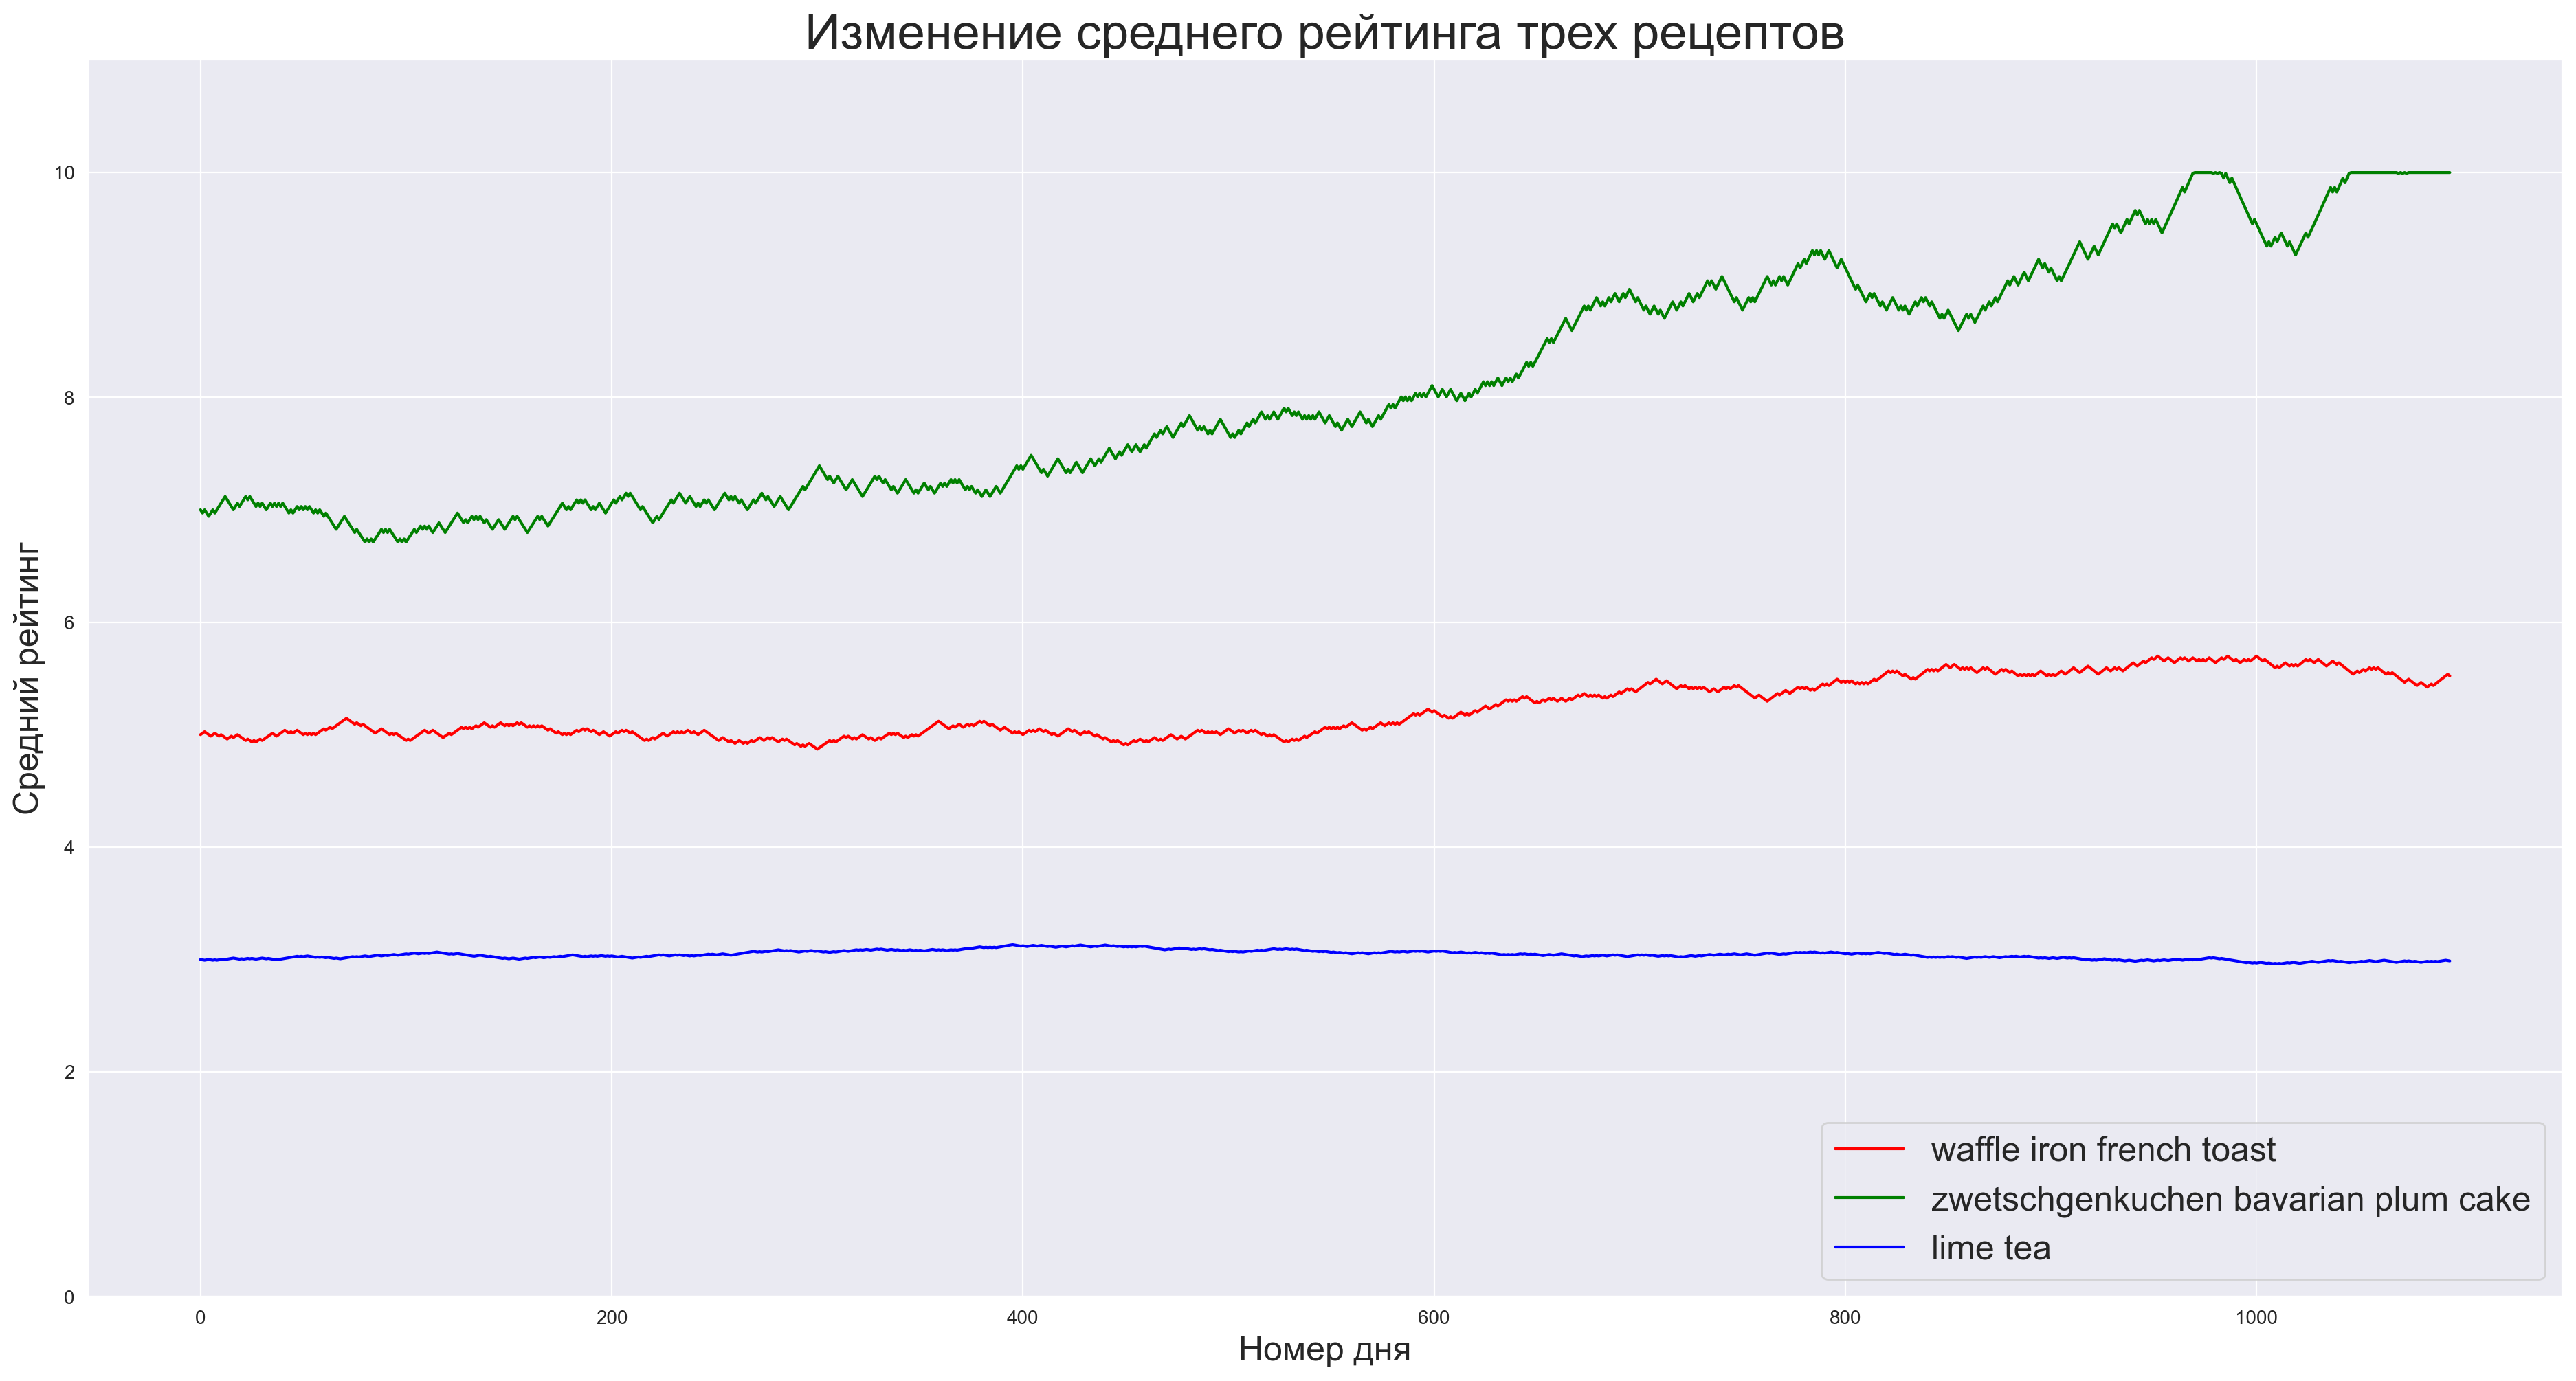

In [184]:
fig1=plt.figure(figsize=(20,10),dpi=200)
ax=fig1.add_axes([0.1,0.1,0.9,0.9])

ax.plot(average_ratings[0],'r', label="waffle iron french toast")
ax.plot(average_ratings[1],'g', label="zwetschgenkuchen bavarian plum cake")
ax.plot(average_ratings[2],'b', label="lime tea")

ax.set_ylim(0,11)
ax.set_ylabel("Средний рейтинг",fontsize=18)
ax.set_xlabel("Номер дня",fontsize=18)
ax.set_title("Изменение среднего рейтинга трех рецептов",fontsize=26)

ax.legend(loc="lower right",fontsize=18)
print()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


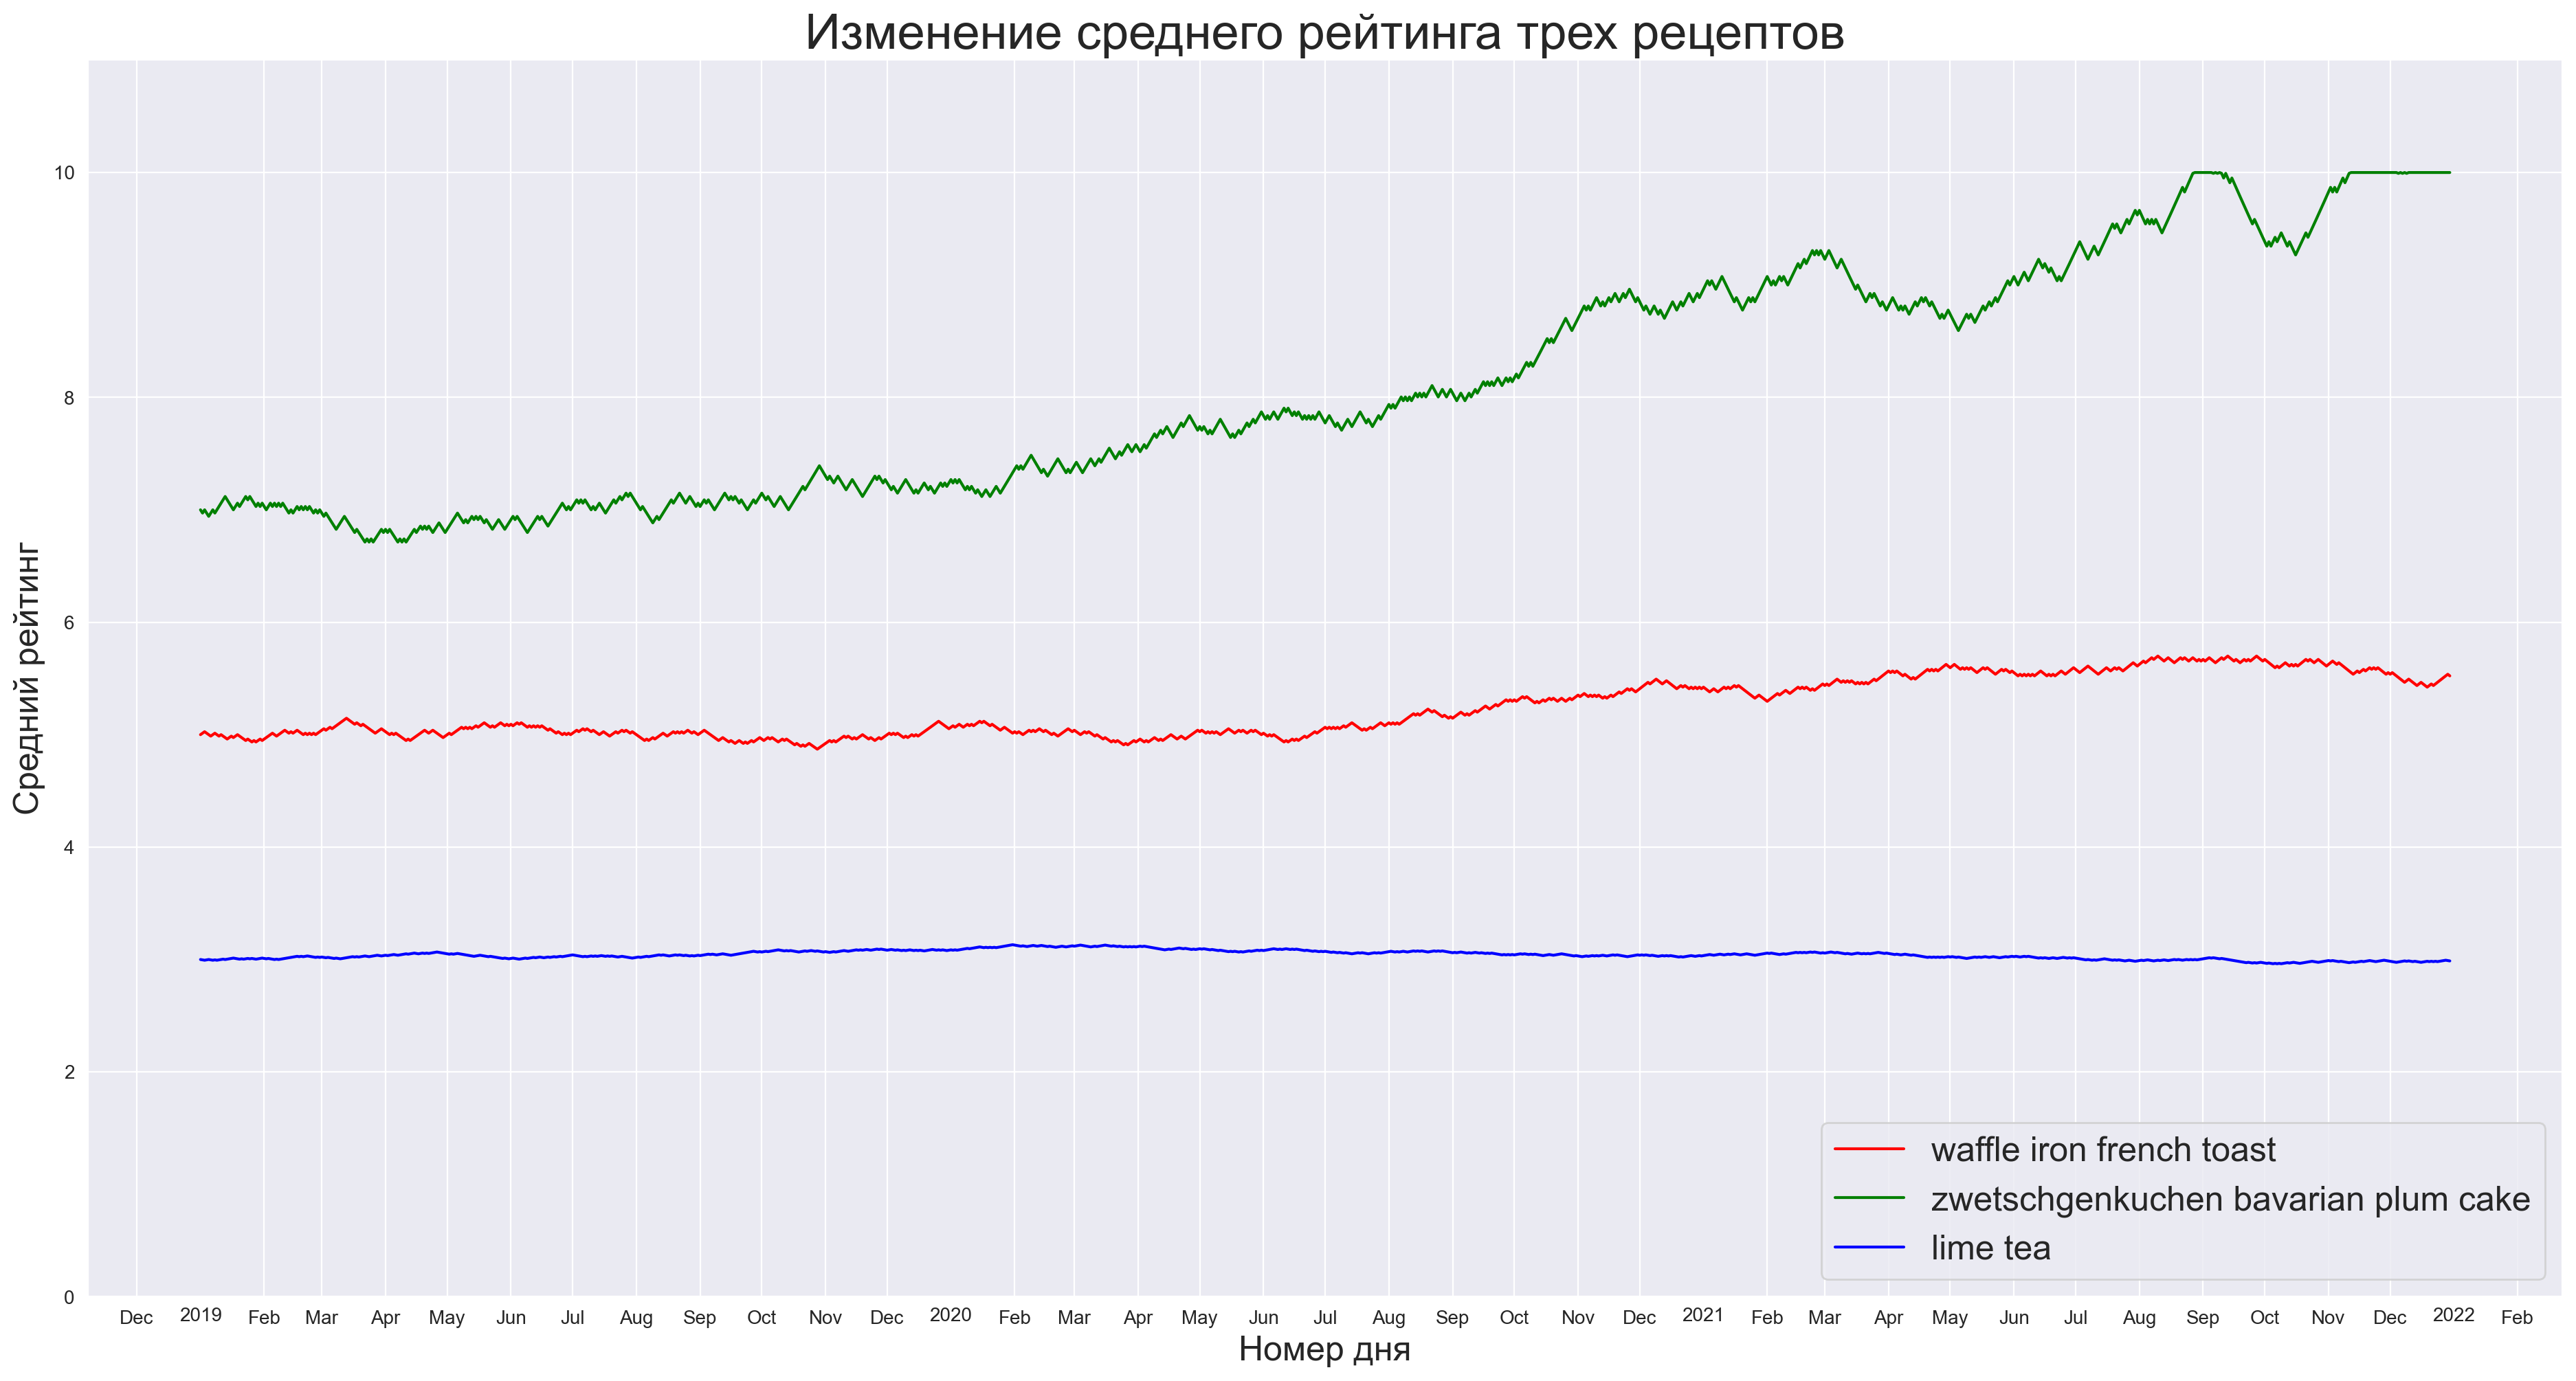

In [185]:
date_rng=pd.date_range("01.01.2019","30.12.2021",freq="D")
fig2=plt.figure(figsize=(20,10),dpi=200)
ax=fig2.add_axes([0.1,0.1,0.9,0.9])

ax.plot(date_rng,average_ratings[0],'r', label="waffle iron french toast")
ax.plot(date_rng,average_ratings[1],'g', label="zwetschgenkuchen bavarian plum cake")
ax.plot(date_rng,average_ratings[2],'b',label="lime tea")

ax.xaxis.set_minor_locator(mdates.YearLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(2,13))) #bymonth=(1,7)

ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylim(0,11)

ax.set_ylabel("Средний рейтинг",fontsize=18)
ax.set_xlabel("Номер дня",fontsize=18)

ax.set_title("Изменение среднего рейтинга трех рецептов",fontsize=26)

ax.legend(loc="lower right",fontsize=18)
print()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

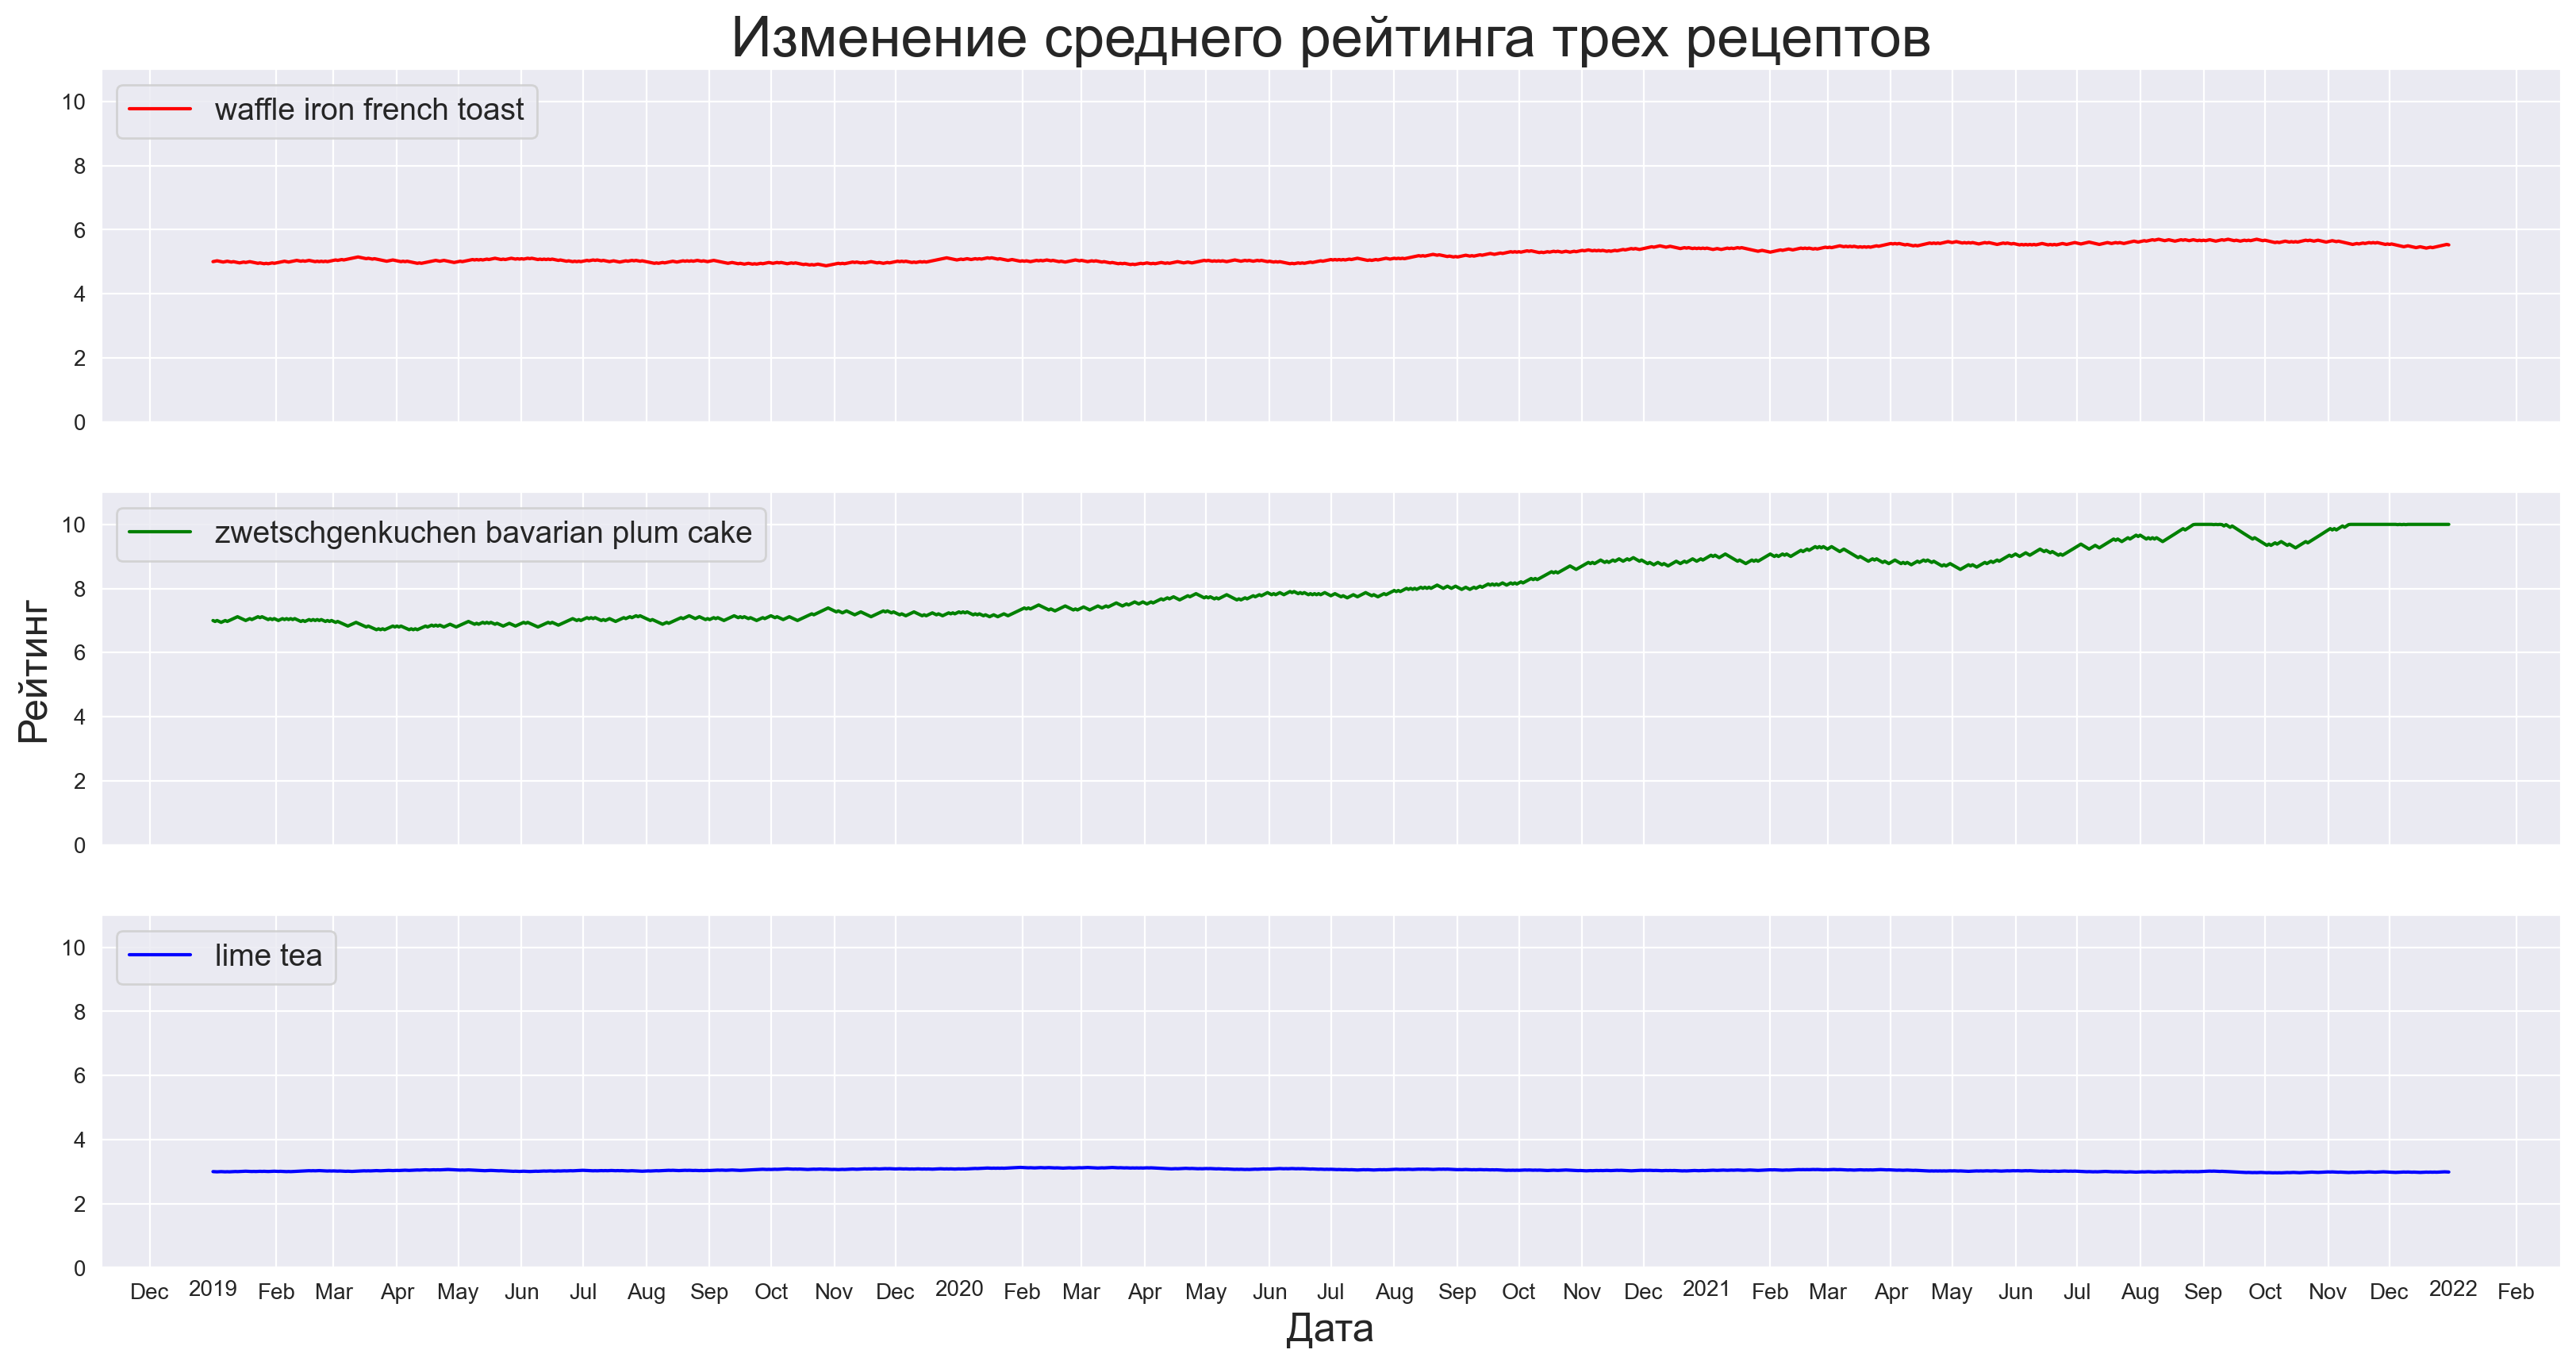

In [186]:
fig3,axs=plt.subplots(3,1,figsize=(20,10),sharex='all',dpi=200)

axs[0].plot(date_rng,average_ratings[0],'r', label="waffle iron french toast")
axs[1].plot(date_rng,average_ratings[1],'g', label="zwetschgenkuchen bavarian plum cake")
axs[2].plot(date_rng,average_ratings[2],'b',label="lime tea")

for ax in axs:
    ax.set_ylim(0,11)
    ax.legend(loc="upper left",fontsize=14)

axs[2].xaxis.set_minor_locator(mdates.YearLocator())
axs[2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(2,13)))
axs[2].xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axs[0].set_title("Изменение среднего рейтинга трех рецептов",fontsize=26)
axs[1].set_ylabel("Рейтинг",fontsize=18)
axs[2].set_xlabel("Дата", fontsize=18)
print()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале.

В обоих случаях изобразите график в виде ломаной, но
* в первом случае оставьте линейный масштаб осей
* во втором случае сделайте вертикальную ось в логарифмическом масштабе.

Добавьте на обе картинки подпись над этим графиком c текстом $y(x)=\lambda e^{-\lambda x}$
Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$.
Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$
Добавьте на оба изображения подписи осей;
горизонтальную ось подпишите текстом "Количество дней с момента акции",
вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [187]:
visitors=np.load(data_folder+"visitors.npy")

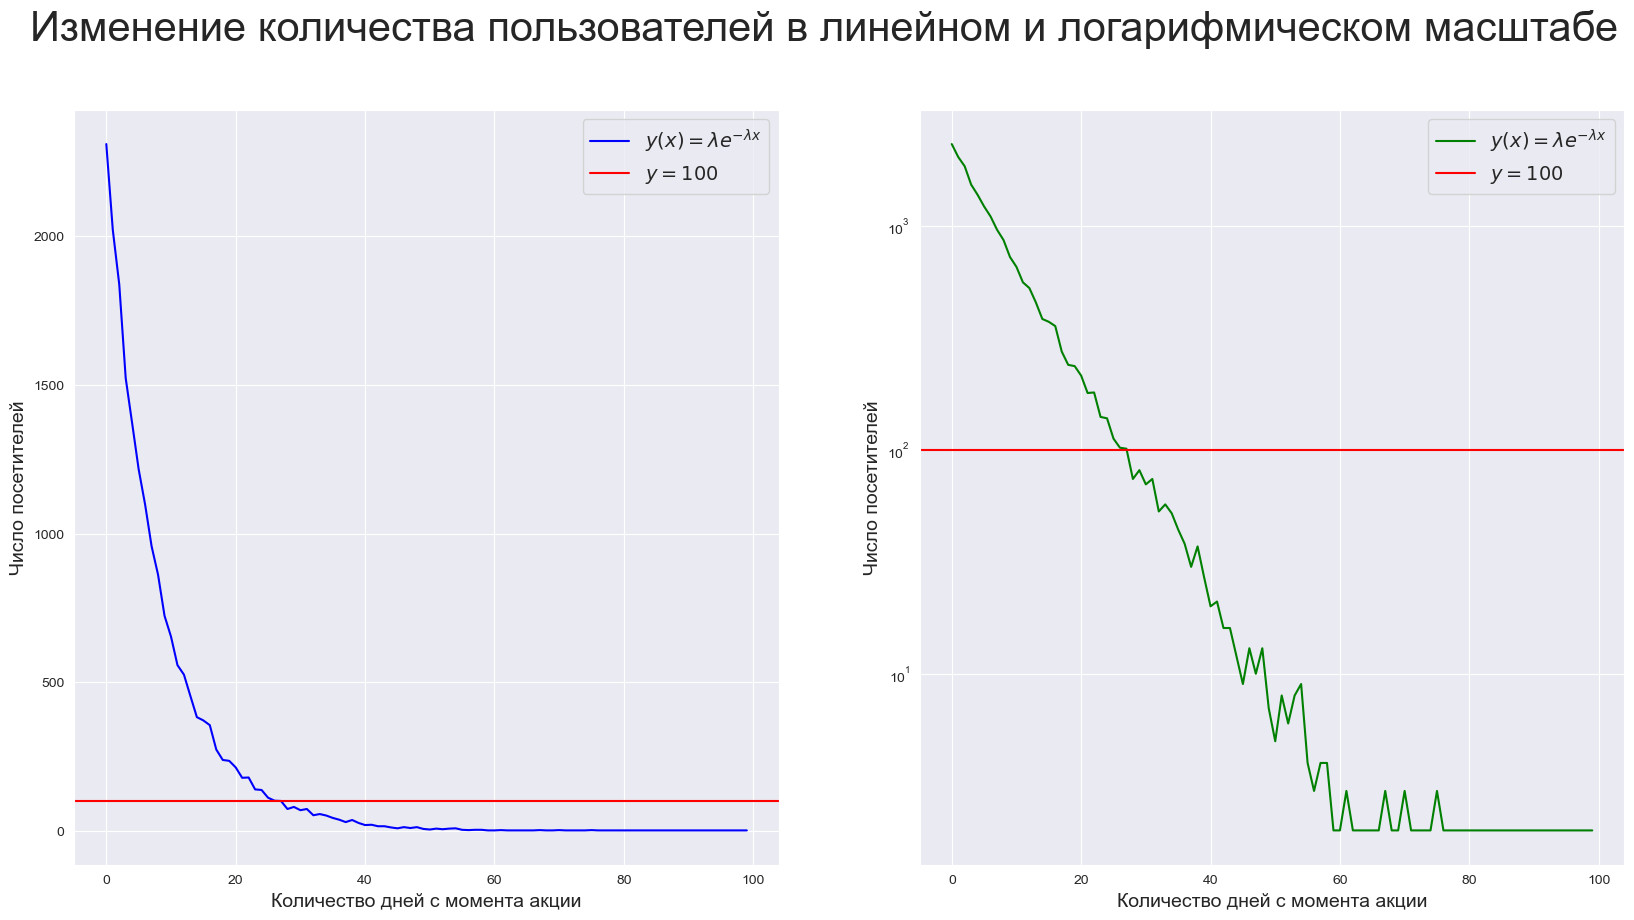

In [188]:
fig4,axs=plt.subplots(1,2,figsize=(20,10),dpi=100)

axs[0].plot(visitors,'b',label="$y(x)=\lambda e^{-\lambda x}$")
axs[1].plot(visitors,'g',label="$y(x)=\lambda e^{-\lambda x}$")

axs[1].set_yscale('log')

for ax in axs:
    ax.axhline(y=100,color='r',label="$y=100$")
    ax.set_ylabel('Число посетителей', fontsize=14)
    ax.set_xlabel('Количество дней с момента акции', fontsize=14)
    ax.legend(fontsize=14)
fig4.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=30)
print()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [191]:
data_folder_lab2='/Users/izuard/Desktop/AI/Sources/data_lab2/'

In [235]:
reviews = pd.read_csv(data_folder_lab2+'reviews_sample.csv',index_col=0)
recipes = pd.read_csv(data_folder_lab2+'recipes_sample.csv')
reviews['date']=pd.to_datetime(reviews['date'])

5\. Назовем рецепты
* короткими, если они занимают строго меньше 5 минут;
* средними, если они занимают от 5 до 50 минут (не включая 50),
* длинными, если они занимают от 50 минут и больше.

Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины:
* среднее количество шагов рецептов в группе
* размер группы.

In [259]:
recipes["category"]=np.where(
    recipes["minutes"]<5,   #condition 1
    'short',                #if condition 1 True
    np.where(               #if condition 1 False
        ((recipes['minutes']>=5) & (recipes['minutes']<50)), #condition 2
        "medium",           #if condition 2 True
        "long"              #if condition 2 False
    )
)

recipes_agg=recipes.groupby("category").agg(
    steps_avg=('n_steps','mean'),
    total_count=('id','count')).reset_index()

recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,category
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,medium
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,medium
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,medium
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,medium
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,long
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,long
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,long
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,long


При помощи методов структур `pandas` постройте столбчатую диаграмму, где
* каждый столбец означает группу (короткие, средние или длинные рецепты),
* высота столбца обозначает среднее количество шагов рецептов в группе.
Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

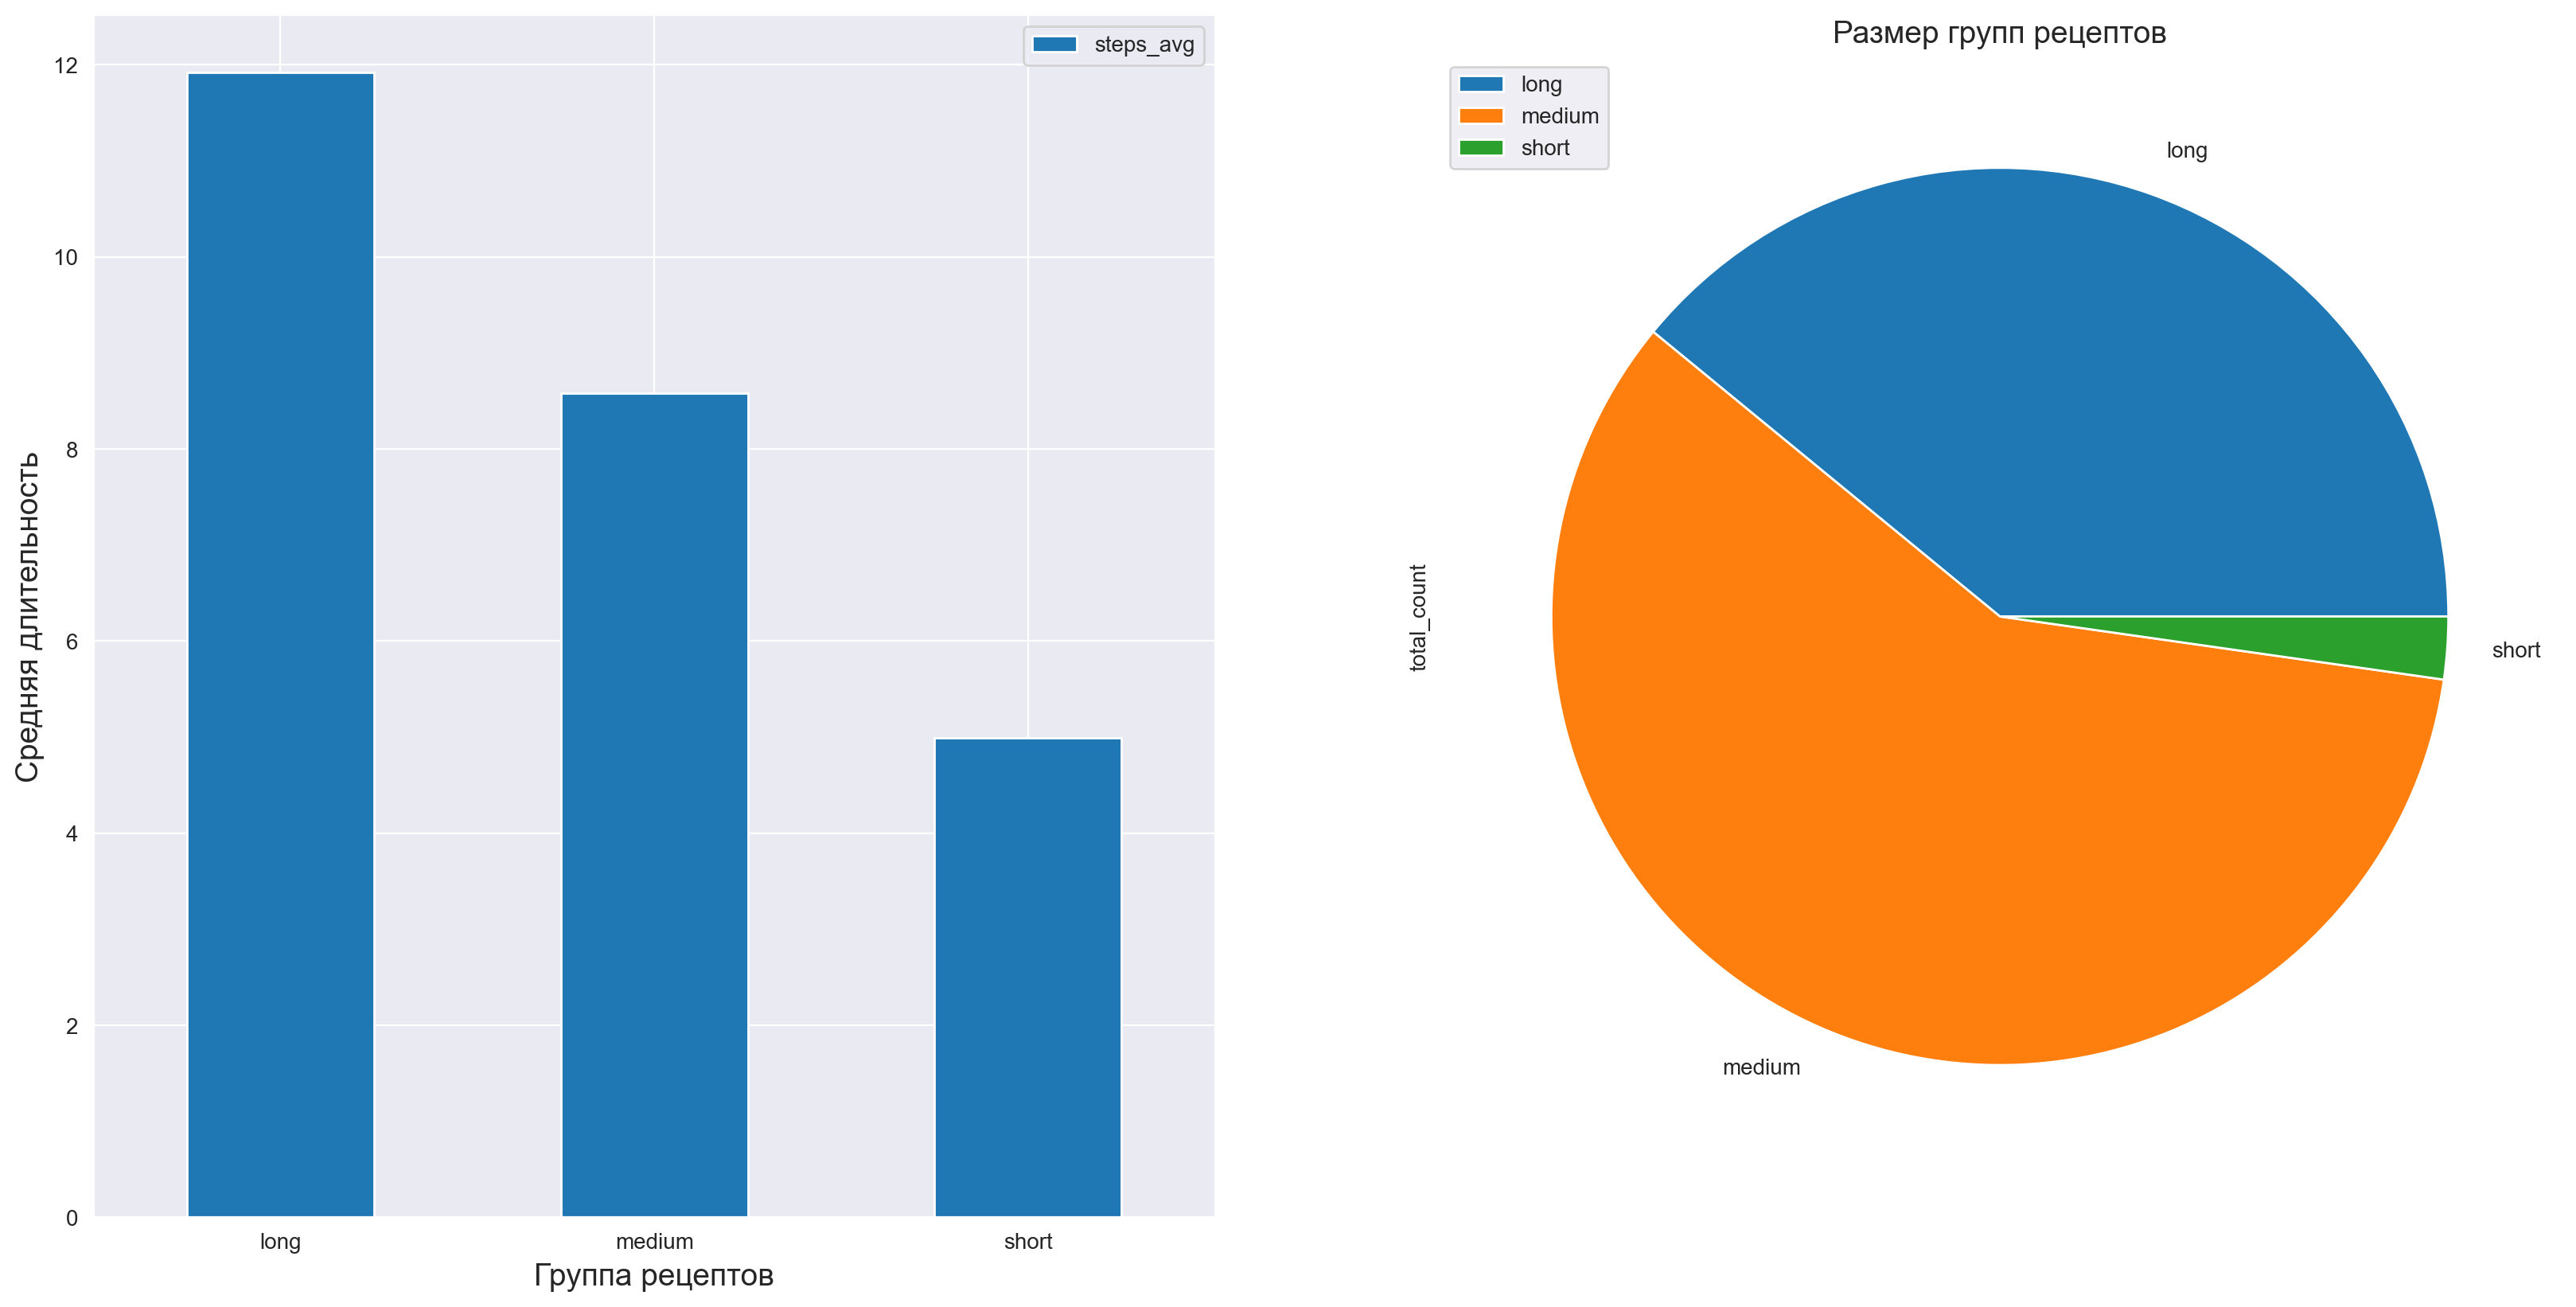

In [244]:
fig5,axs=plt.subplots(1,2,figsize=(20,10),dpi=200)

recipes_agg.plot(x='category',y='steps_avg',kind='bar', ax=axs[0])
recipes_agg.plot(y='total_count',kind='pie',labels=recipes_agg['category'],ax=axs[1])

axs[0].set_xlabel("Группа рецептов",fontsize=14)
axs[0].set_ylabel("Средняя длительность", fontsize=14)
axs[0].set_xticklabels(recipes_agg['category'],rotation=0)

axs[1].set_title("Размер групп рецептов",fontsize=14)
print()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

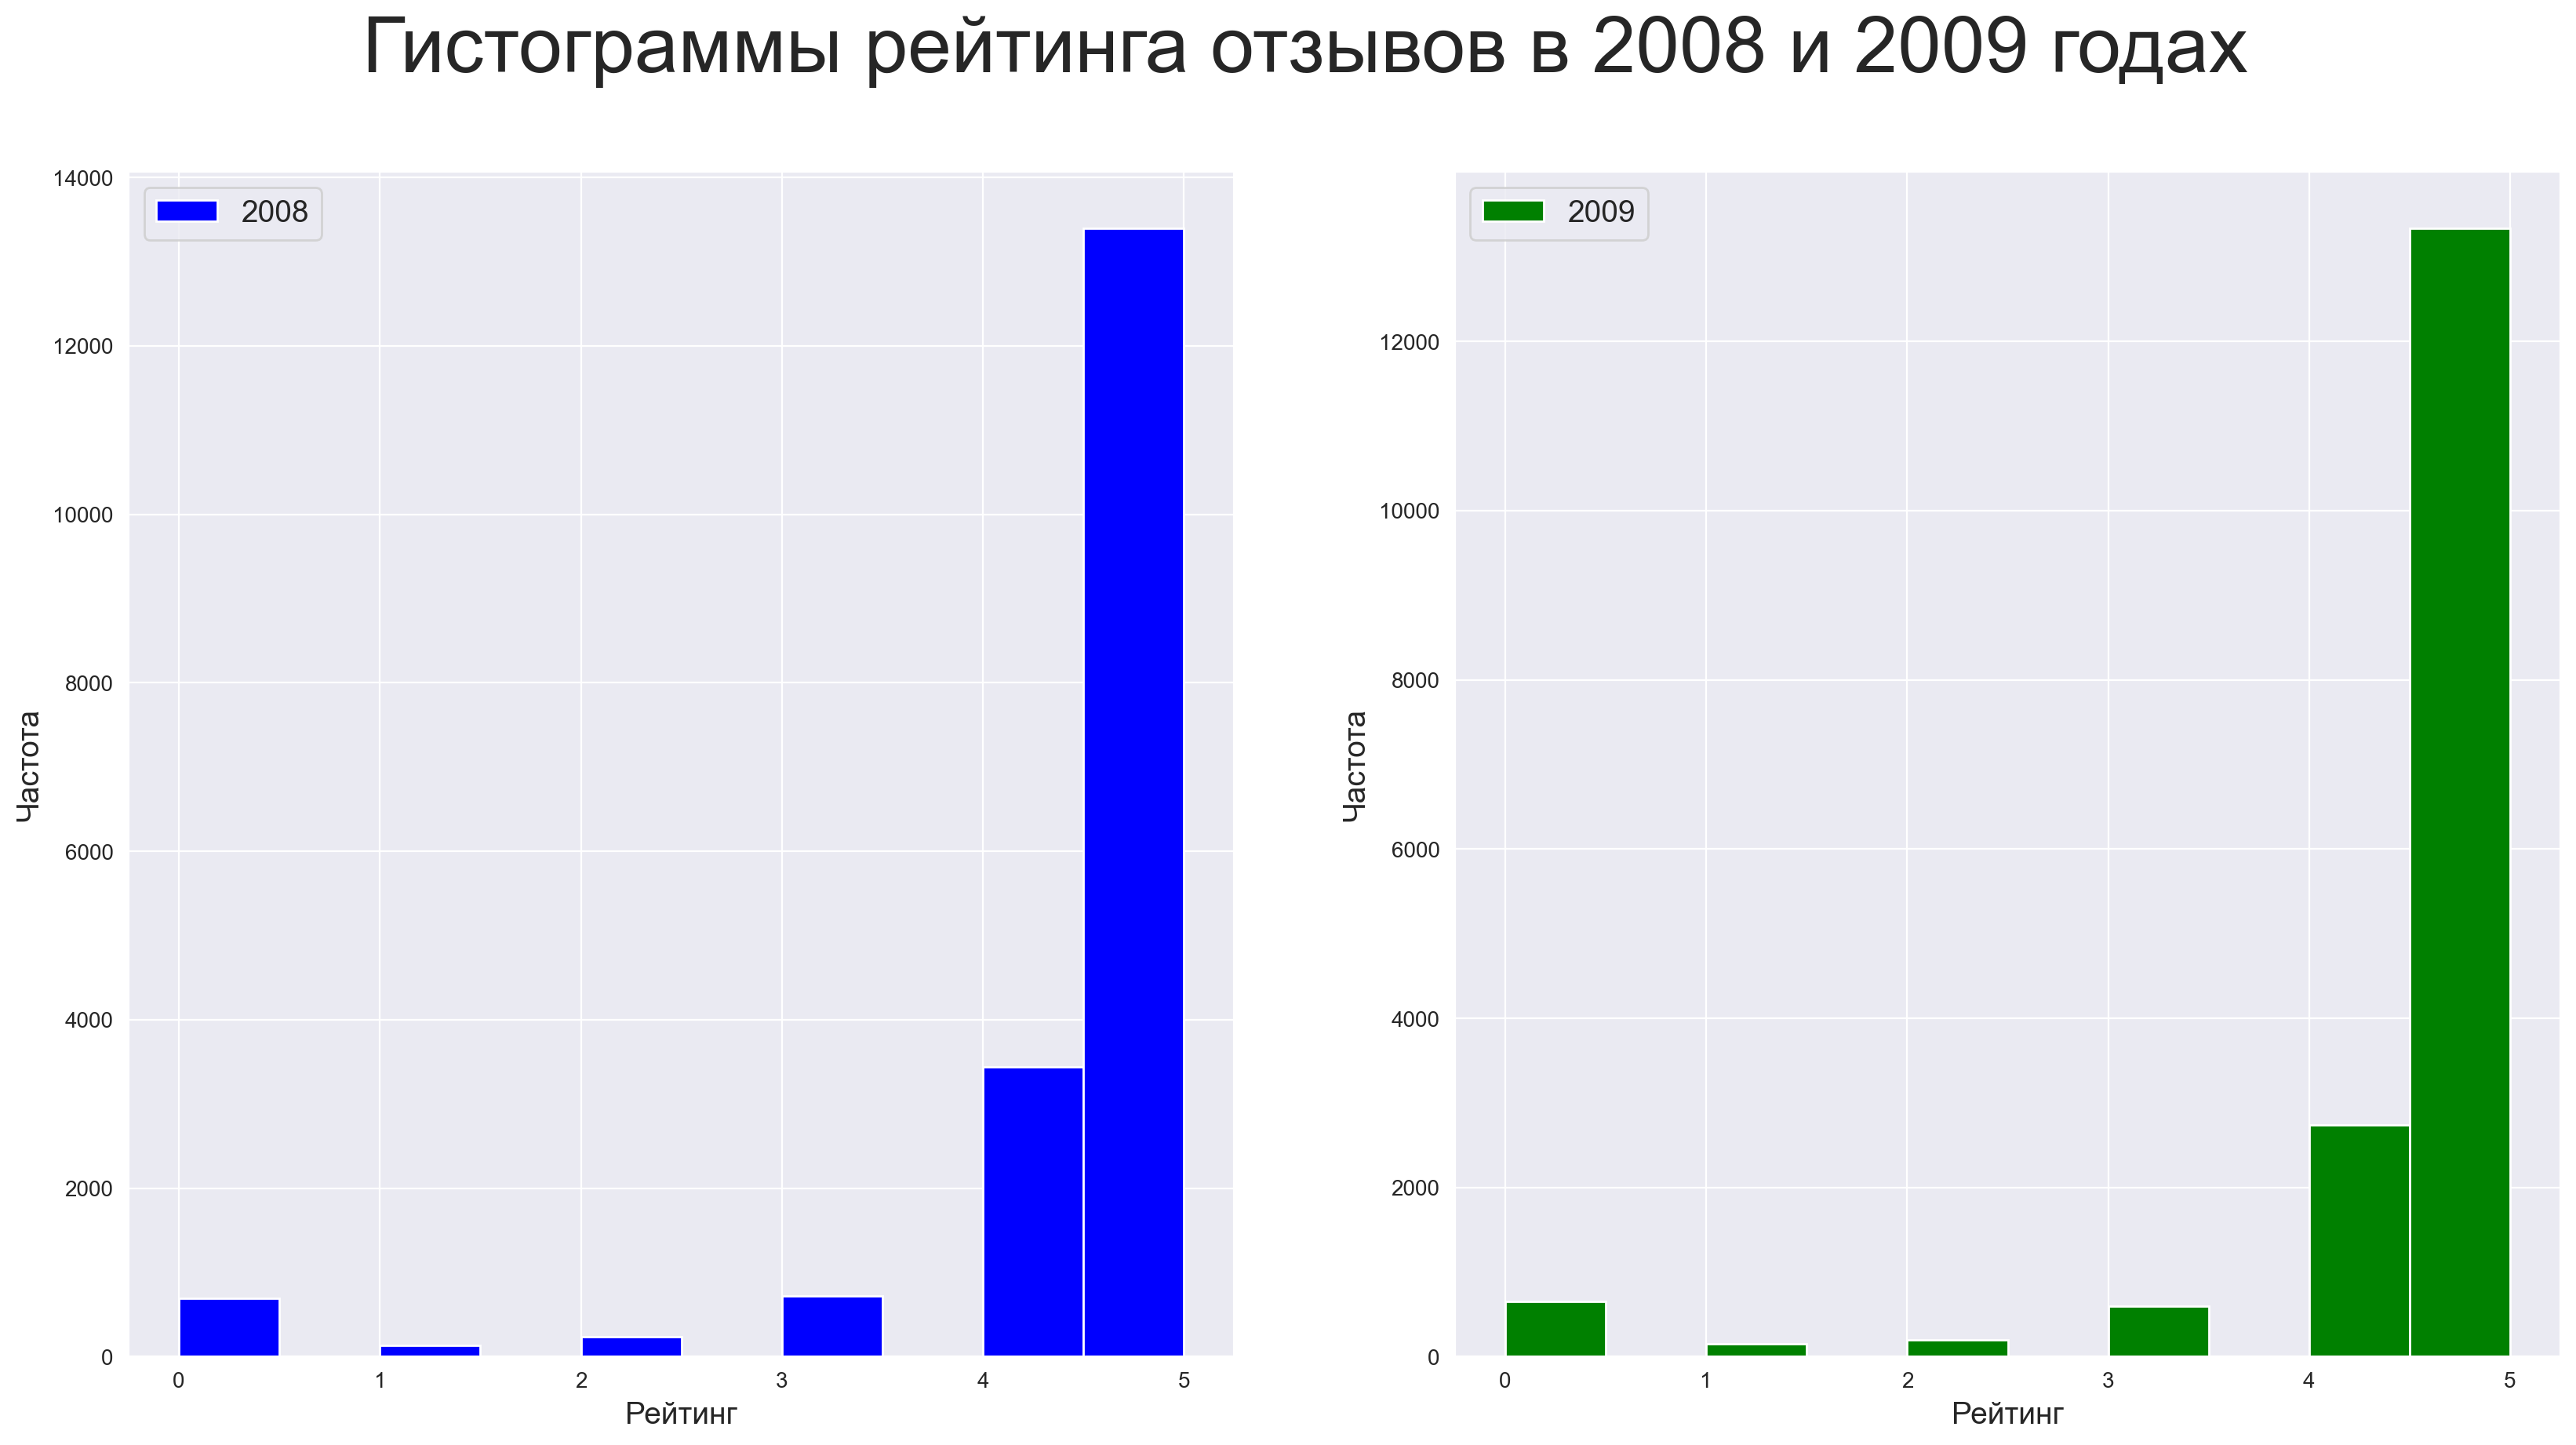

In [291]:
reviews08=reviews[reviews['date'].dt.year==2008]
reviews09=reviews[reviews['date'].dt.year==2009]

fig6,axs=plt.subplots(1,2,figsize=(20,10),dpi=200)

reviews08.plot(y='rating',kind='hist',ax=axs[0],label='2008',color='b')
reviews09.plot(y='rating',kind='hist',ax=axs[1],label='2009',color='g')

for ax in axs:
    ax.set_xlabel("Рейтинг",fontsize=14)
    ax.set_ylabel("Частота",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)

fig6.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах",fontsize=36)
print()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

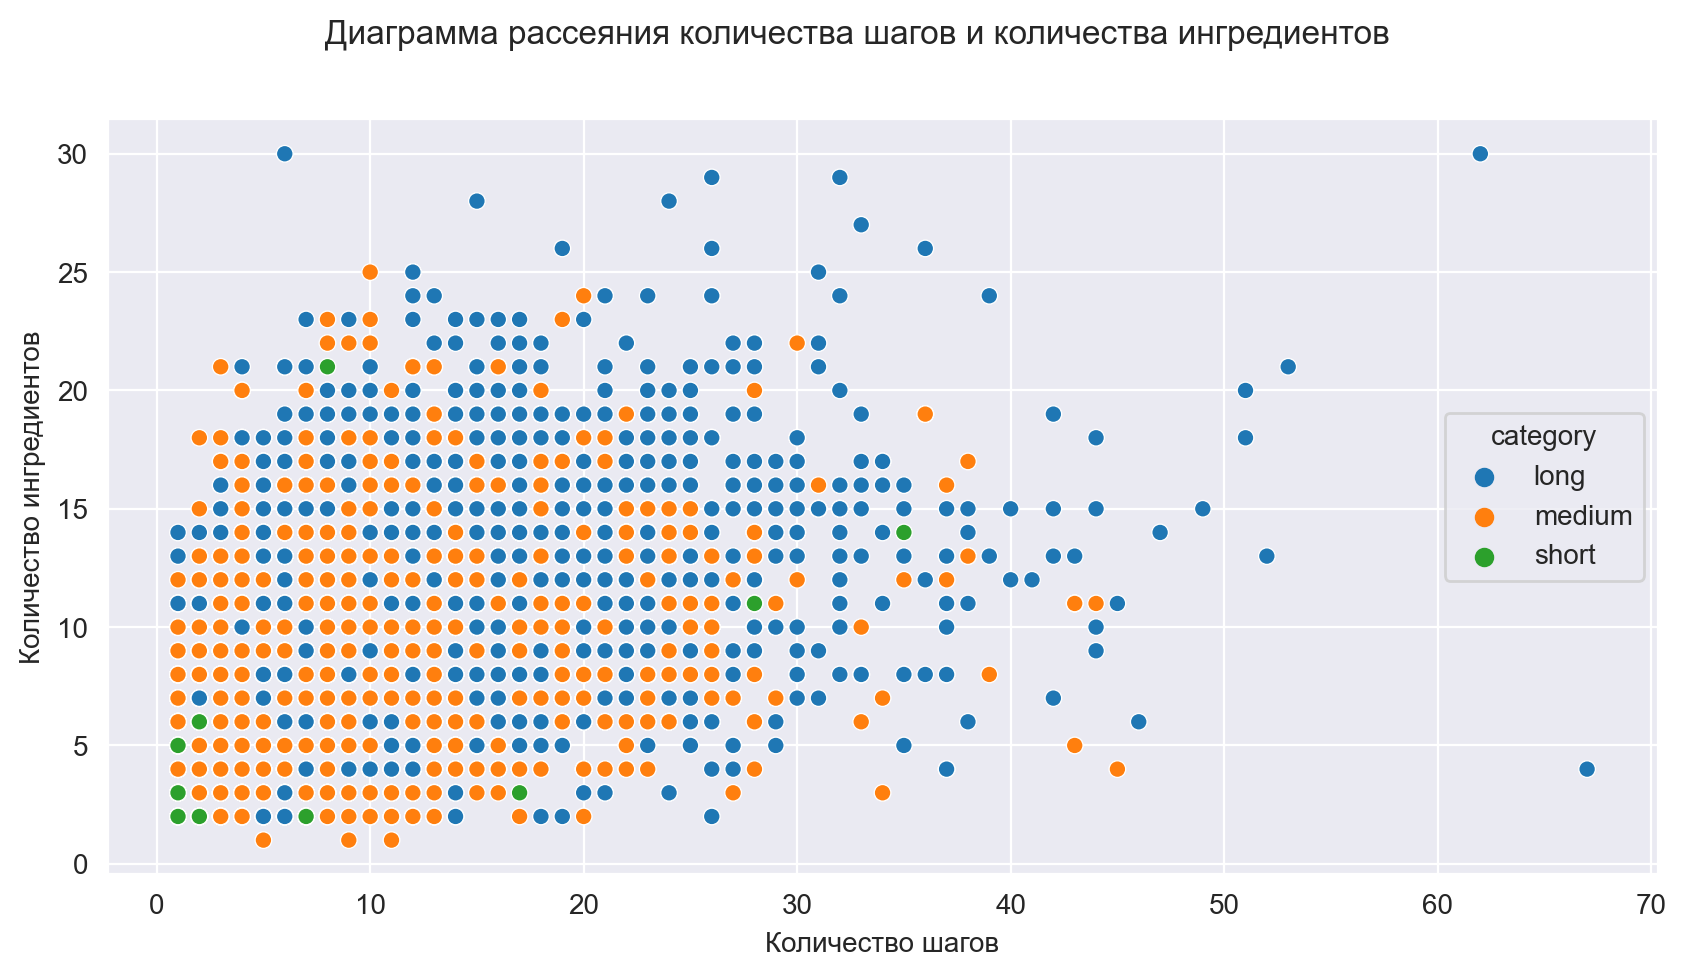

In [264]:
fig7,ax=plt.subplots(figsize=(10,5),dpi=200)
sns.scatterplot(x=recipes['n_steps'],
                y=recipes['n_ingredients'],
                hue=recipes['category'],
                data=recipes,ax=ax)
ax.set_ylabel('Количество ингредиентов')
ax.set_xlabel('Количество шагов')
fig7.suptitle('Диаграмма рассеяния количества шагов и количества ингредиентов')
print()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

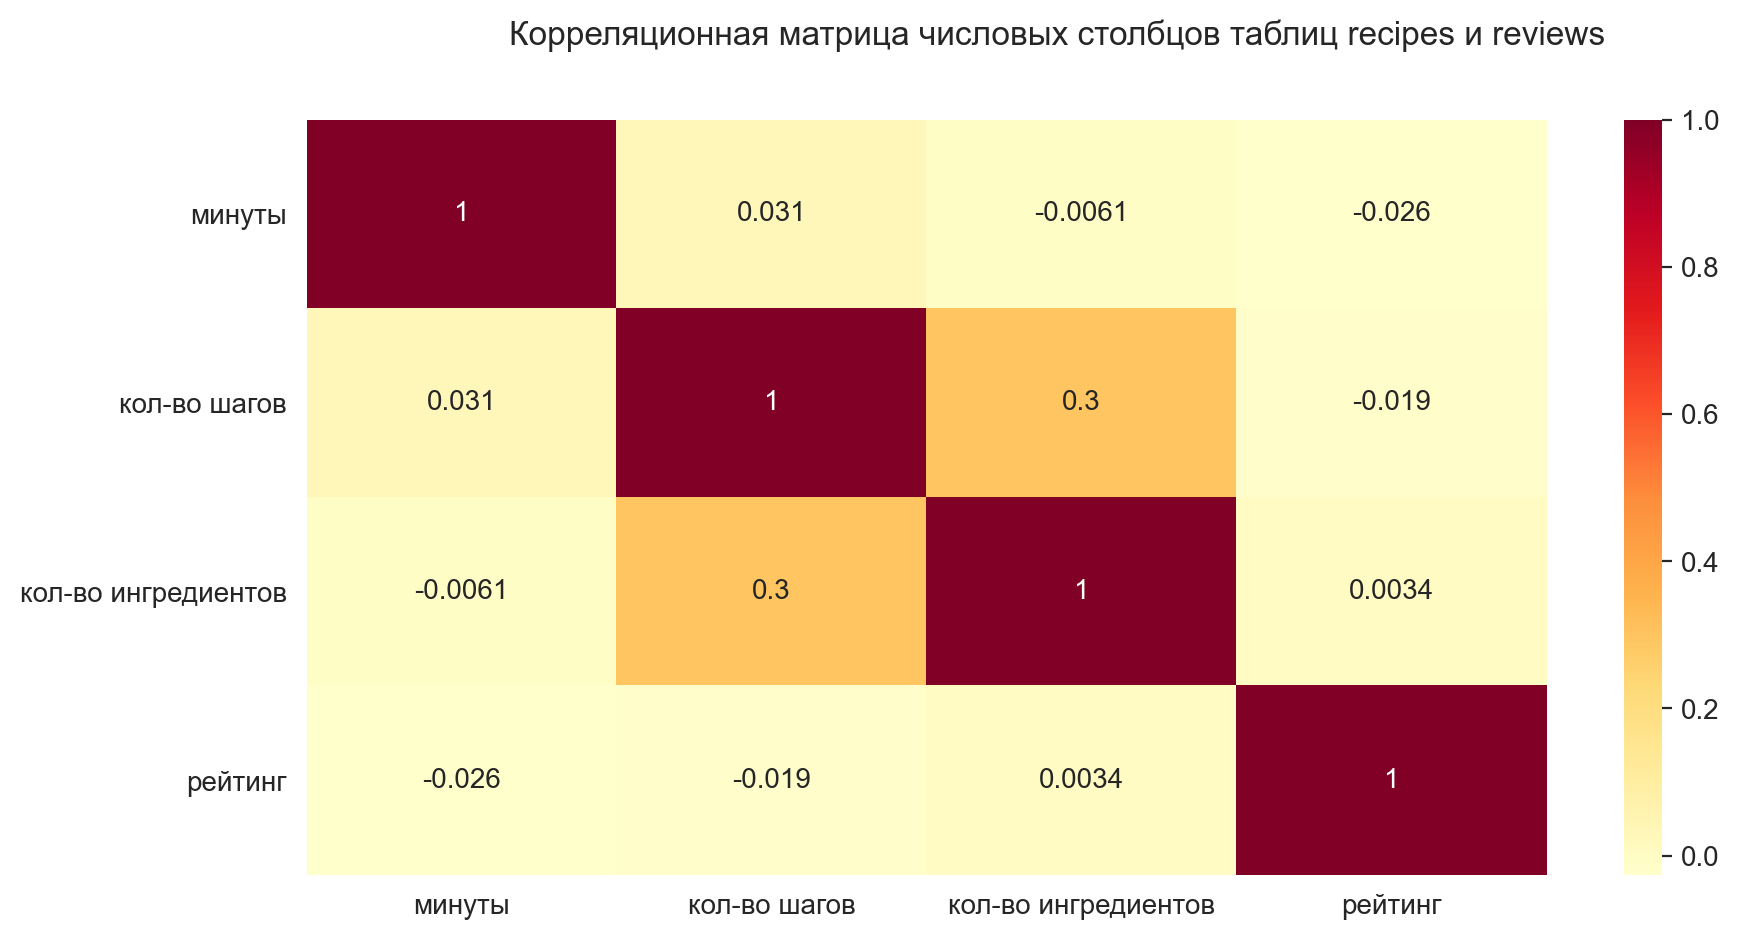

In [285]:
union=recipes.merge(right=reviews,how='left',left_on='id',right_on='recipe_id')
union.rename(columns={'minutes':'минуты',
              'n_steps':'кол-во шагов',
              'n_ingredients':'кол-во ингредиентов',
              'rating':'рейтинг'},inplace=True)
cor_matrix=union[['минуты','кол-во шагов', 'кол-во ингредиентов','рейтинг']].corr()

fig8,ax=plt.subplots(figsize=(10,5),dpi=200)
sns.heatmap(cor_matrix,cmap='YlOrRd',annot=True,ax=ax)
fig8.suptitle('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
print()